In [1]:
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [3]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epoch:   1 loss: 364.18630981
epoch:  26 loss: 28.46475983
epoch:  51 loss: 0.47589546
epoch:  53 loss: 0.0000880624


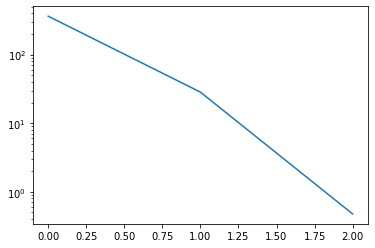

In [4]:

r = 100  # ohm


def I(u):
    global r
    return r * u


epochs = 300

loses = []
end =False
for i in range(epochs):
    for u in np.random.rand(100,):
        u = torch.tensor([u], dtype=torch.float)
        target = torch.tensor([I(u)])
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(u)
    
        single_loss = loss_function(y_pred, target)
        single_loss.backward()
        optimizer.step()
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
        loses.append(single_loss.item())
    if single_loss.item() < 0.0001:
        end = True
        break
    if end:
        break

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
plt.yscale('log')
plt.plot(loses)


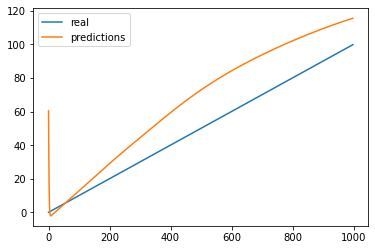

In [10]:

errors = []
predictions = []
real = []
time = []
N = 1000
for u in range(1, N):
    real.append(I(u/N))
    predictions.append(model(torch.tensor([u/N], dtype=torch.float)).item())
    errors.append(predictions[-1] - real[-1])

plt.plot(real, label='real')
plt.plot(predictions, label='predictions')
plt.legend()


(array([ 13.,  11.,  10.,  11.,  11.,  10.,  10.,  10.,  10.,  10.,  10.,
         11.,  10.,  10.,  11.,  10.,  10.,  11.,  10.,  11.,  11.,  12.,
         11.,  12.,  12.,  12.,  13.,  13.,  13.,  22.,  28.,  29.,  30.,
         31.,  33.,  35.,  36.,  41.,  43.,  50.,  59.,  77., 164.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-2.87644401, -2.24396712, -1.61149023, -0.97901334, -0.34653645,
         0.28594043,  0.91841732,  1.55089421,  2.1833711 ,  2.81584799,
         3.44832488,  4.08080176,  4.71327865,  5.34575554,  5.97823243,
         6.61070932,  7.2431862 ,  7.87566309,  8.50813998,  9.14061687,
         9.77309376, 10.40

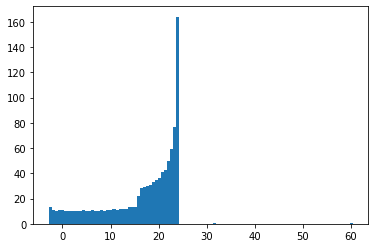

In [11]:
plt.hist(errors, bins=100)